# Week 04 Exercises 

## 4.1

Let's start with some basic practice using the **shapely** package. Do the following steps:


<ol type="a">
  <li>Creat a polygon from the following points: (-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890,(-118.4142,33.96990,9-118.4152,33.9699)</li>
  <li>Create a new variable that stores both x and y coordinates</li>
  <li>What is the centroid of this polygon?</li>
  <li>What is the bounding box? Write an explanation of what the bounding box actual means relative to the polygon.</li>
</ol>


4.1.1

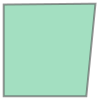

In [39]:
from shapely.geometry import Point, LineString, Polygon
poly = Polygon([(-118.4152,33.9699),(-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890),(-118.4142,33.969909),(-118.4152,33.9699)])
poly_type = poly.geom_type
poly

In [40]:
poly_coords = poly.exterior.coords
len(poly_coords)

6

4.1.2

In [41]:
x_var = []
for x,y in poly_coords:
    x_var.append(x)
print('x coordinates:', x_var)

x coordinates: [-118.4152, -118.4152, -118.4144, -118.4143, -118.4142, -118.4152]


In [42]:
y_var = []
for x,y in poly_coords:
    y_var.append(y)
print('y coordinates:', y_var)

y coordinates: [33.9699, 33.9689, 33.9689, 33.9689, 33.969909, 33.9699]


4.1.3

In [43]:
poly_centroid = poly.centroid
print('Polygon centroid is ', poly_centroid)

Polygon centroid is  POINT (-118.41472389113082 33.96941102718237)


4.1.4

In [51]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box
poly.bounds

(-118.4152, 33.9689, -118.4142, 33.969909)

In [53]:
min_x, min_y = -118.4152, 33.9689
max_x, max_y = -118.4142, 33.969909
poly_bound = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
print("Bounding box: ", poly_bound)

Bounding box:  POLYGON ((-118.4142 33.9689, -118.4142 33.969909, -118.4152 33.969909, -118.4152 33.9689, -118.4142 33.9689))


A bounding box is necessary in order to visualize the size of your geometric object.

Justice Equity Need Index (JENI)## 4.2

Now let's move on with practicing using **geopandas** and working with various CRS. We will use the County of Los Angeles Justice Equity Need Index (by zip code). Some information on the dataset:
The Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. Updated 2022.

The Justice Equity Need Index (JENI), by Advancement Project California, offers a means to map out the disparate burden that criminalization and a detention-first justice model place on specific communities. The index includes the following indicators:

<ol type="1">

<li>System Involvement: The system-involved population by ZIP Code results in direct needs for justice equity, as measured by adult and youth probation.

- Indicators: Adult Probation (per 1,000 people); Youth Probation (per 1,000 people) </li>

<li>Inequity Drivers: Root inequities across communities that contribute to racial and economic disparities as seen in incarceration and policing.

- Indicators: Black, Latinx, AIAN, and NHPI Percentages of Population (average percentile); Unemployment Rate (%); Population aged 25+ without a High School Diploma (%); Population below 200% of the Federal Poverty Level (%); Violent Crime Rate (per 1,000 people)</li>

<li>Criminalization Risk: Conditions where the criminal justice system has historically taken a detention-first, prevention-last approach.

- Indicators: Mental Health Hospitalizations (per 1,000 people); Substance Use-Related Hospitalizations (per 1,000 people); Homelessness Rate (per 1,000 people)</li>
</ol>

Learn more at https://www.advancementprojectca.org/tools-we-use/maps-and-data/justice-equity-need-index.

Supervisorial Districts, SPAs, and CSAs determined by ZIP Code centroid.


Complete the following tasks:

<ol type="a">
  <li>Load the dataset as a geopandas dataframe. The data is located under 'data/Justice_Equity_Need_Index.geojson' </li>
  <li>What is the default CRS? Write a sentence about what type of CRS it is.</li>
  <li>Remember, geopandas is just the spatial version of pandas with lots of the same functionality. Knowing some commands from pandas from previous exercises, answer the following:

  - What is the size of the dataframe?
  - List the column names.
  - Show the first 10 rows of the dataframe. </li>
  <li>Make a copy of the dataframe. 

  - Reproject the CRS is epsg:3857
  - Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS. Make sure to use clear titles
  - Write a few sentences of differences you see in the visualizations between the two.  </li>
</ol>


4.2.1

In [55]:
import geopandas as gpd
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)
data.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


4.2.2

In [56]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The default CRS is WGS 84 which uses the earth's center as its refrence point in order to project the given geometry data. 

4.2.3

In [58]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         281 non-null    int64   
 1   zip              281 non-null    object  
 2   jenicategory     281 non-null    object  
 3   jenipctl         281 non-null    float64 
 4   jenirank         281 non-null    int64   
 5   riskcategory     281 non-null    object  
 6   riskpctl         281 non-null    float64 
 7   driverscategory  281 non-null    object  
 8   driverspctl      281 non-null    float64 
 9   systemcategory   281 non-null    object  
 10  systempctl       281 non-null    float64 
 11  neighborhood     281 non-null    object  
 12  sup_dist         280 non-null    object  
 13  spa              280 non-null    object  
 14  csa              278 non-null    object  
 15  SHAPE_Length     281 non-null    float64 
 16  SHAPE_Area       281 non-null    flo

In [60]:
data.columns

Index(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [65]:
data.head(10)

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
5,6,90077,Lowest,1.8,272,Lowest,2.5,Lowest,13.6,Lowest,1.4,Bel-Air,District 3,SPA 5 - West,Los Angeles - Bel Air,0.268660,0.001831,"MULTIPOLYGON (((-118.45549 34.13449, -118.4555..."
6,7,91436,Lowest,2.2,271,Lowest,10.4,Lowest,5.4,Lowest,2.5,Encino,District 3,SPA 2 - San Fernando,Los Angeles - Encino,0.232985,0.001614,"MULTIPOLYGON (((-118.49296 34.18609, -118.4929..."
7,8,90094,Lowest,2.5,270,Lowest,9.0,Lowest,6.5,Lowest,4.7,Playa Vista,District 2,SPA 5 - West,Los Angeles - Playa Vista,0.152547,0.000306,"MULTIPOLYGON (((-118.40129 33.98378, -118.4008..."
8,9,91007,Lowest,2.9,269,Lowest,3.2,Lowest,10.0,Lowest,6.9,Arcadia,District 5,SPA 3 - San Gabriel,City of Arcadia,0.212972,0.001380,"MULTIPOLYGON (((-118.05051 34.14841, -118.0500..."
9,10,90049,Lowest,3.3,268,Lowest,13.6,Lowest,2.5,Lowest,4.3,Brentwood,District 3,SPA 5 - West,Los Angeles - Brentwood,0.395030,0.003870,"MULTIPOLYGON (((-118.48933 34.13154, -118.4886..."


In [68]:
dataorig = data.copy()

In [69]:
data = data.to_crs(epsg=3857)
%matplotlib inline
import matplotlib.pyplot as plt

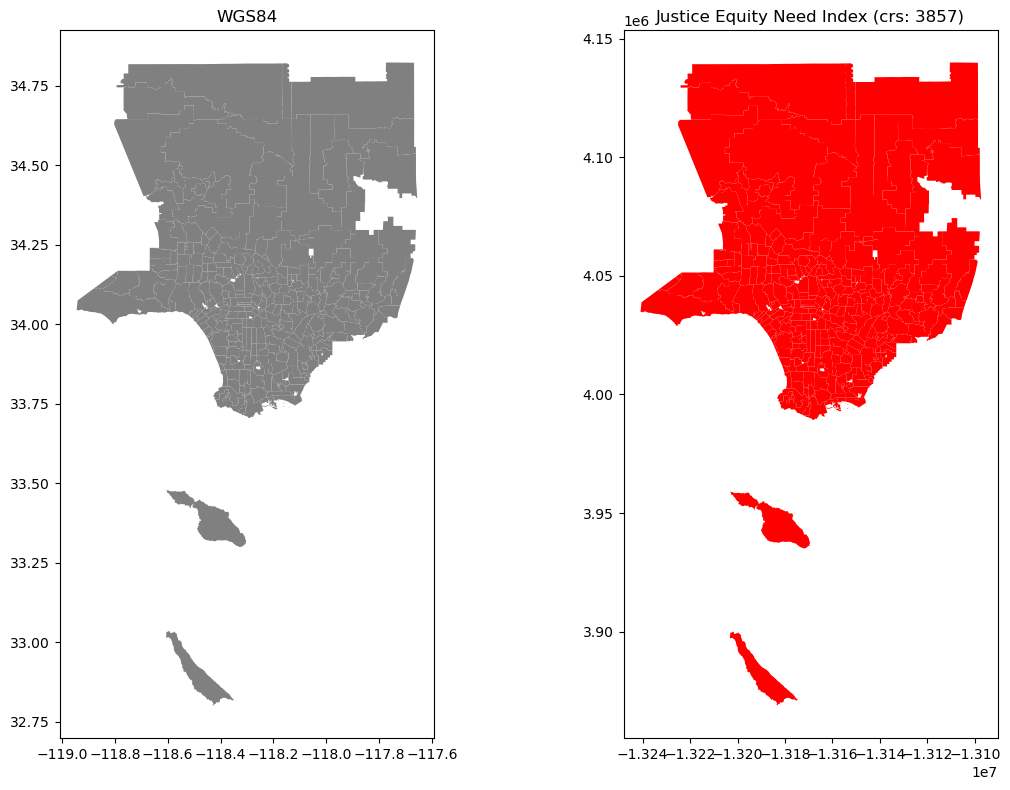

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
dataorig.plot(ax=ax1, facecolor='gray');
ax1.set_title("WGS84");
data.plot(ax=ax2, facecolor='red');
ax2.set_title("Justice Equity Need Index (crs: 3857)");
plt.tight_layout()

The map in the reprojected image depicts a more accurate representation of Los Angeles county. It is not as stretched out or as far as the WGS 84 projection. 